Open Food Facts

### Sommaire

* [Importer les libraries](#chapter1)
* [Importer le csv](#chapter2)
* [Analyse univariée](#chapter3)
* [Boite a moustache](#chapter4)
* [Analyse bivariée](#chapter5)
* [ACP](#chapter6)
* [ANOVA](#chapter7)

<a class="anchor" id="chapter1"></a>Importer les libraries

In [39]:
import pandas as pd
import missingno as msno
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import matplotlib.gridspec as gridspec
import sklearn
import warnings

pd.set_option('display.max_row',200)
pd.set_option('display.max_column',70)
pd.set_option('display.precision', 5)

<a class="anchor" id="chapter2"></a>Importer le csv

In [40]:
off = pd.read_csv('./off2.csv')

In [41]:
off

,code,product_name,quantity,brands,categories,countries,nutrition_grade_fr,states_fr,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,40608754,"Pepsi, Nouveau goût !",15 cl,Pepsi,Sodas au cola,France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas,177.0,0.00,10.40,0.000,0.0254,0.01000,13.0
1,87177756,7Up,33 cl,"7Up,Pepsico","Sodas au citron,Boissons sucrées",France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas aux fruits,177.0,0.00,10.40,0.000,0.1000,0.03937,13.0
2,10,Madeleines nature,880 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1900.0,2.50,26.00,6.000,0.6600,0.25984,12.0
3,30,Cakes Raisins,900 g,Bijou,"Cakes aux raisins,Cakes,Gâteaux",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1768.0,2.50,28.00,5.800,0.6500,0.25591,13.0
4,31,Cakes aux Fruits,600 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Pâtisseries,1670.0,2.00,34.00,4.900,0.6000,0.23622,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40112,9557129019006,Healtier palm oil (L'huile de palme),500 ml,Carotino,Huiles de palme,France,d,"A compléter,Informations nutritionnelles compl...",Huiles,3400.0,39.00,0.00,0.000,0.0000,0.00000,16.0
40113,9577283844672,100% Pur Jus 4 agrumes,1 L,Cora,"Aliments et boissons à base de végétaux,Boisso...",France,c,"A vérifier,Complet,Informations nutritionnelle...",Jus de fruits,192.0,0.00,9.20,0.600,0.0300,0.01181,4.0
40114,96068779,Spearmint sans sucres,25 g,Fisherman's Friend,Bonbons,France,c,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1017.0,1.28,0.12,0.040,0.0050,0.00197,4.0
40115,96118580,Fisherman's Friend Miel-Citron,25 g,Fisherman's Friend,"Bonbons,Pastilles",France,b,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1031.0,1.28,0.10,0.004,0.0010,0.00039,2.0


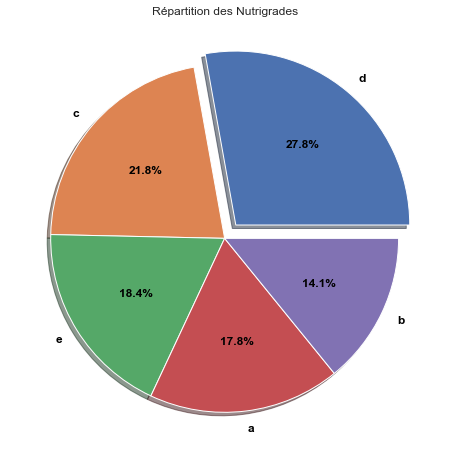

In [42]:
nutrigrades = off.groupby(by='nutrition_grade_fr')['code'].nunique().sort_values(ascending=False)
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))

explodes = np.zeros(5)
explodes[0] = .1

plt.pie(nutrigrades, labels=nutrigrades.index, 
        startangle=0, 
        shadow=True,
        explode=explodes,
        autopct='%1.1f%%',
        textprops=dict(color="black",size=12, weight="bold"))
plt.title("Répartition des Nutrigrades")
plt.show()

<a class="anchor" id="chapter3"></a>Analyse univariée

In [43]:
numeric_columns = off.select_dtypes(include = ['int32','float64']).columns

numeric_columns

Index(['energy_100g', 'saturated-fat_100g', 'sugars_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g'],
      dtype='object')

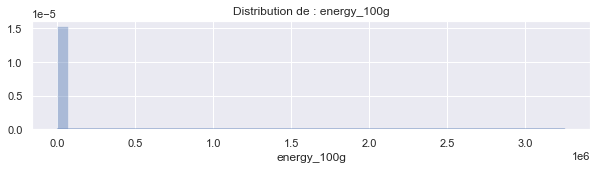

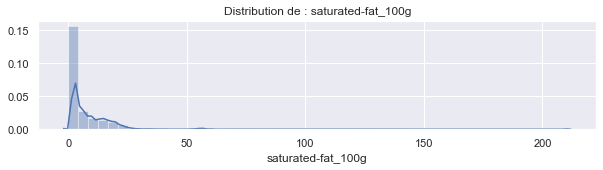

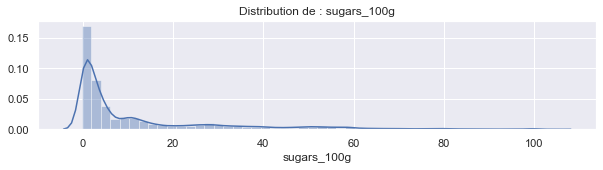

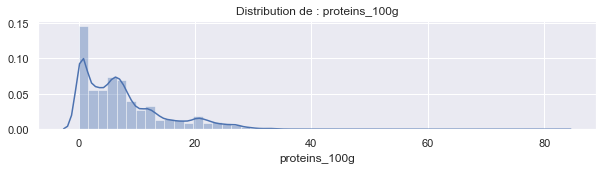

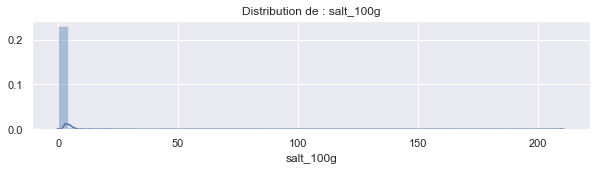

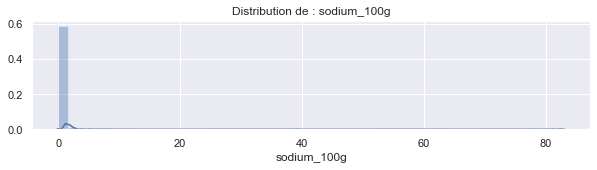

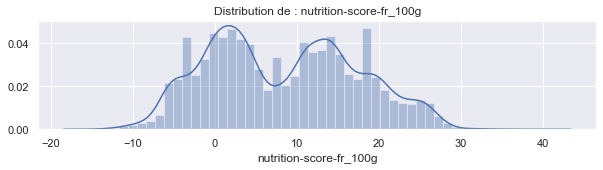

In [44]:
for column in numeric_columns:
    plt.figure(figsize = (10,2))
    sns.set(font_scale=1)
    sns.distplot(off[column], bins=50)
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()

<a class="anchor" id="chapter4"></a>Boites a moustache

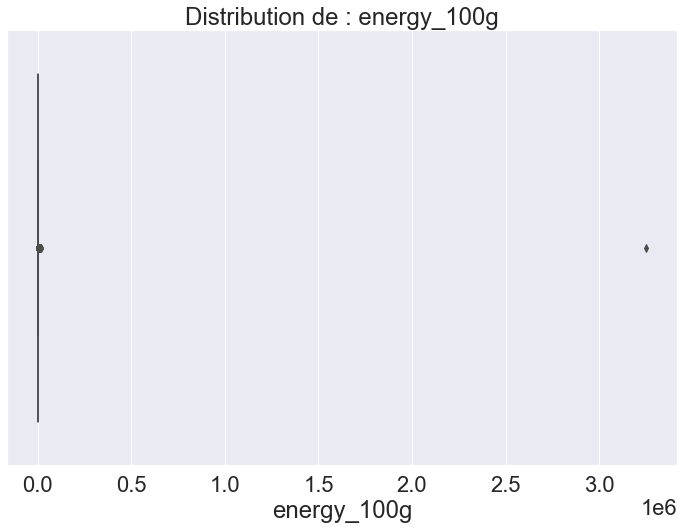

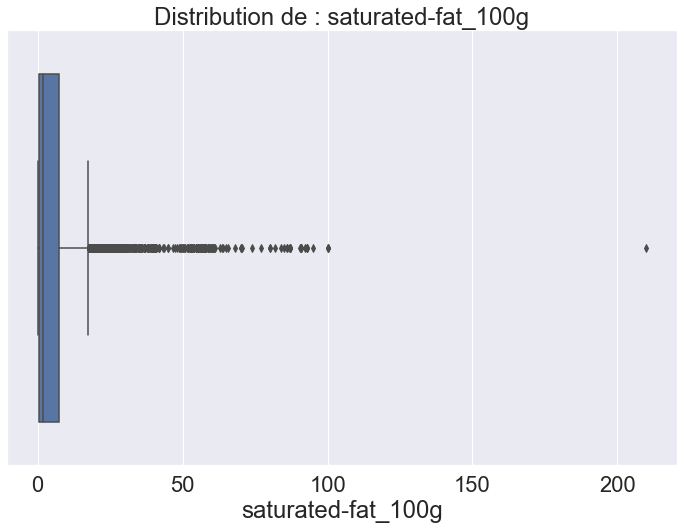

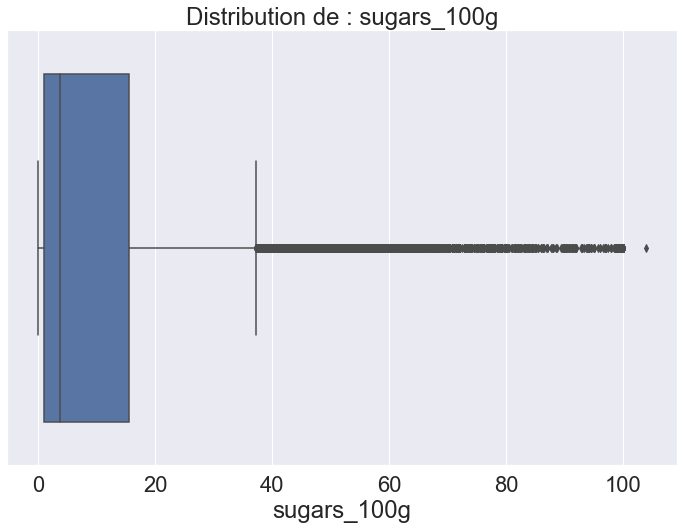

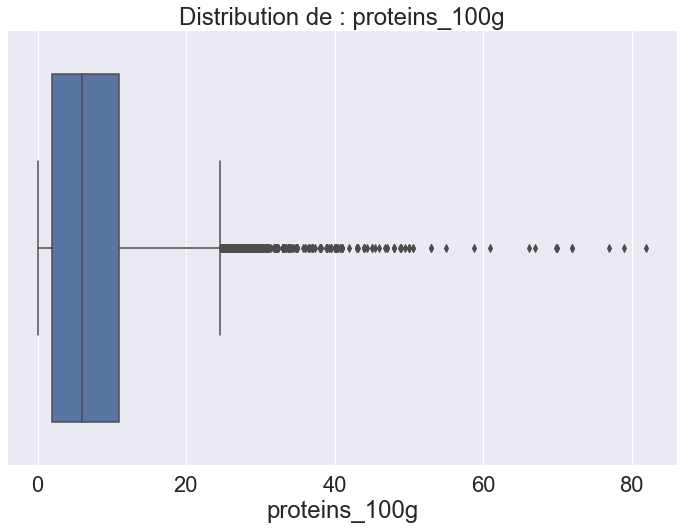

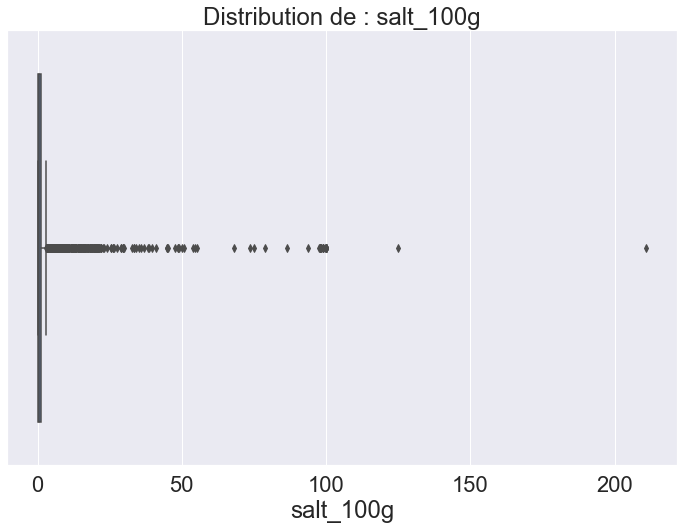

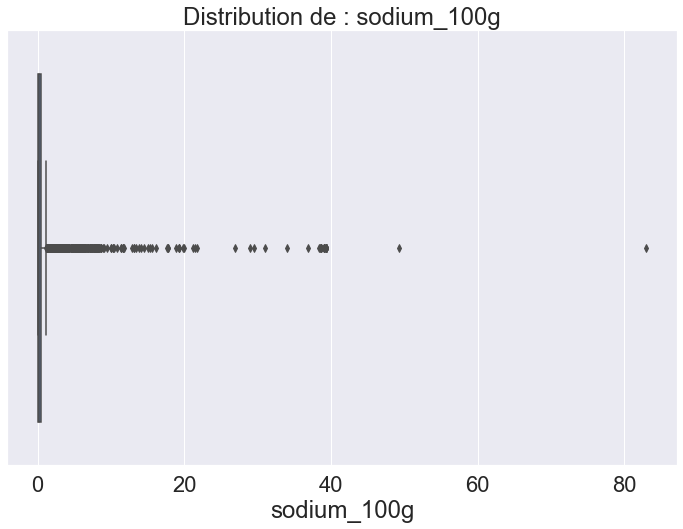

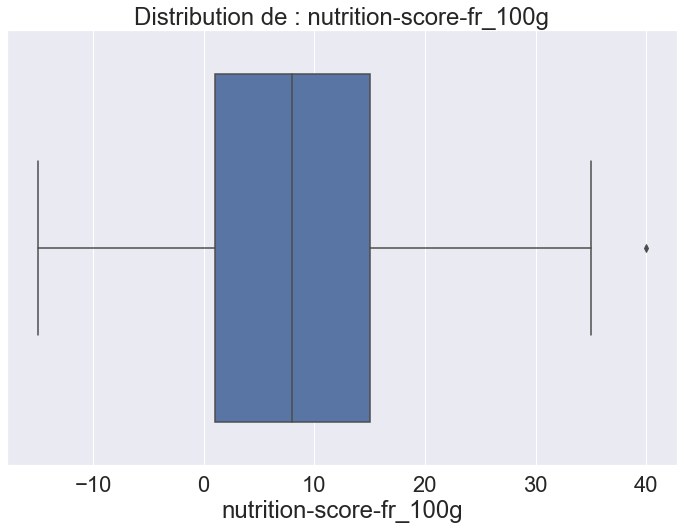

In [45]:
numeric_columns = off.select_dtypes(include = ['int32','float64']).columns
sns.set(font_scale=2)
for column in numeric_columns:
    plt.figure(figsize = (12,8))
    
    sns.boxplot(off[column])
    chaine = 'Distribution de : ' + column
    plt.title(chaine)
    plt.xlabel(column)
    plt.show()
sns.set(font_scale=1)

<a class="anchor" id="chapter5"></a>Analyse bivariée

C:\Users\utilisateur\anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  import sys


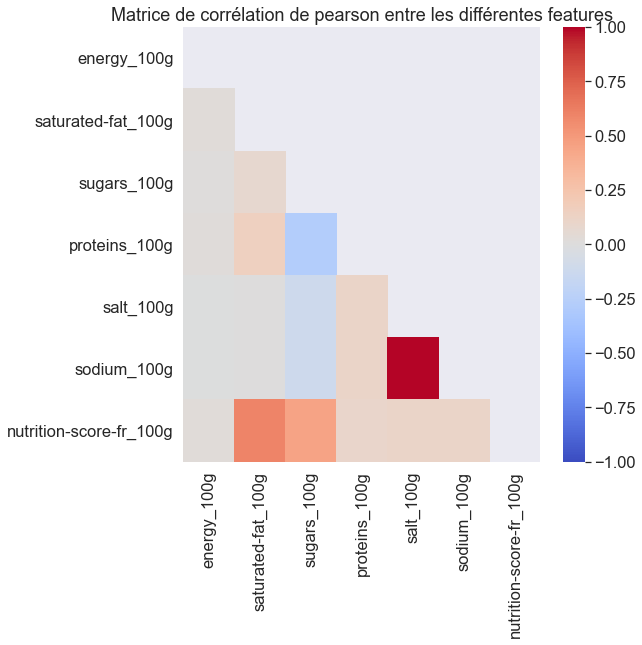

In [46]:
plt.figure(figsize=(8,8))
sns.set(font_scale=1.5)
plt.title('Matrice de corrélation de pearson entre les différentes features')

corr = off[numeric_columns].corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True 

ax = sns.heatmap(corr, mask=mask, vmin=-1, cmap='coolwarm')
plt.show()
sns.set(font_scale=1)

<a class="anchor" id="chapter6"></a>ACP

In [47]:
from sklearn.preprocessing import StandardScaler
import sklearn
from sklearn import decomposition, preprocessing
import warnings

In [48]:
# Sélection des colonnes pour l'ACP
cols_acp = off.select_dtypes(include=[np.number]).columns.to_list()
# Nombre de composantes
n_comp = len(cols_acp)
# Données pour l'ACP
data_acp = off[cols_acp]
# Noms affichés
names = off['proteins_100g']
features = data_acp.columns
X = data_acp.values

In [49]:
# Centrage et Réduction - Mise à l'échelle
std_scaler = preprocessing.StandardScaler().fit(X)
X_scaled = std_scaler.transform(X)

In [50]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(n_components=8)

In [51]:
# Valeurs propres ou variances des composantes principales
val_propres = pca.explained_variance_
val_propres

array([2.08195649e+00, 1.78047663e+00, 1.23084317e+00, 9.97668503e-01,
       9.95755200e-01, 6.56622869e-01, 2.56876504e-01, 6.31131860e-08])

In [52]:
pca.components_.T

array([[-1.19407547e-03,  3.78962930e-02,  1.02834508e-01,
         5.87565862e-01, -8.01714741e-01,  4.01811615e-04,
         2.67938682e-03, -2.26023470e-08],
       [ 6.71231823e-03,  4.77914810e-02, -7.62492723e-02,
         8.06654953e-01,  5.83651136e-01,  2.22580708e-02,
        -4.54800176e-03, -2.24666755e-07],
       [ 1.30351740e-01,  5.54730711e-01, -3.57975552e-01,
        -4.36403844e-02, -4.99177988e-02,  5.36881178e-01,
         5.04478044e-01, -9.12593112e-06],
       [-1.03183230e-01,  4.69685511e-01,  5.27936442e-01,
        -1.70071271e-02,  7.88571645e-02, -5.27742654e-01,
         4.52782345e-01, -1.04347992e-05],
       [ 2.00840660e-01, -8.78338901e-03, -7.12107836e-01,
         1.10016394e-02, -8.38526786e-02, -6.52571157e-01,
         1.39595445e-01,  2.30277379e-06],
       [ 6.70207000e-01, -1.07891442e-01,  1.85865780e-01,
         3.46890835e-03,  2.05029648e-02,  1.57797984e-02,
         6.29023930e-02,  7.07105231e-01],
       [ 6.70208680e-01, -1.078901

In [53]:
df_pca = pd.DataFrame(pca.components_,
                      index=['PC'+str(i+1) for i in range(n_comp)],
                      columns=cols_acp).T
df_pca


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
code,-0.00119,0.03790,0.10283,0.58757,-0.80171,0.00040,0.00268,-2.26023e-08
energy_100g,0.00671,0.04779,-0.07625,0.80665,0.58365,0.02226,-0.00455,-2.24667e-07
saturated-fat_100g,0.13035,0.55473,-0.35798,-0.04364,-0.04992,0.53688,0.50448,-9.12593e-06
sugars_100g,-0.10318,0.46969,0.52794,-0.01701,0.07886,-0.52774,0.45278,-1.04348e-05
proteins_100g,0.20084,-0.00878,-0.71211,0.01100,-0.08385,-0.65257,0.13960,2.30277e-06
salt_100g,0.67021,-0.10789,0.18587,0.00347,0.02050,0.01578,0.06290,7.07105e-01
sodium_100g,0.67021,-0.10789,0.18586,0.00347,0.02050,0.01578,0.06287,-7.07108e-01
nutrition-score-fr_100g,0.18336,0.66678,-0.02368,-0.04166,-0.00476,-0.08002,-0.71629,1.59110e-05


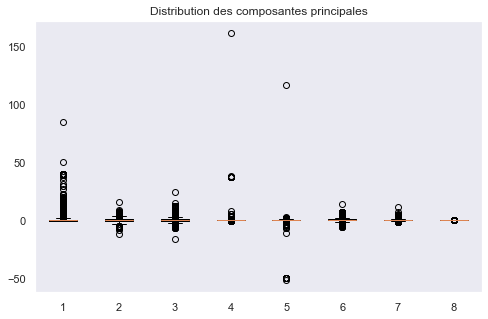

In [54]:
# Composantes principales de l'ACP
C = pca.transform(X_scaled)
plt.figure(figsize=(8, 5))
plt.boxplot(C)
plt.title('Distribution des composantes principales')
plt.grid(False)
plt.show()

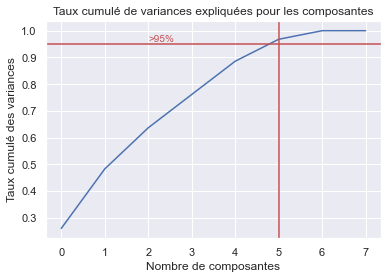

In [55]:
# quel est le pourcentage de variance préservée par chacune de
# nos composantes?
variances = pca.explained_variance_ratio_

# quelle est la somme cumulée de chacune de ces variances?
meilleur_dims = np.cumsum(variances)

#  on va trouver le moment où on attient 95% ou 99% entre réduire au maxi
# où garder au maxi
plt.plot(meilleur_dims)
# argmax pour > 95 %
best = np.argmax(meilleur_dims > 0.95)
plt.axhline(y=0.95, color='r')
plt.text(2, 0.96, '>95%', color='r', fontsize=10)
plt.axvline(x=best, color='r')
plt.title('Taux cumulé de variances expliquées pour les composantes')
plt.xlabel('Nombre de composantes')
plt.ylabel('Taux cumulé des variances')
plt.show()

In [28]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Centrage et réduction
X2 = off.select_dtypes(include=['float64','int64'])
X2_scaled = scaler.fit_transform(X2)

#Instanciation de l'ACP
pca = PCA(svd_solver='full').fit(X2_scaled)
X_projected = pca.transform(X2_scaled)

In [29]:
#Espace des composantes principales
pcs = pca.components_

#Matrice des corrélations variables x facteurs
p = X2.shape[1]
sqrt_valprop = np.sqrt(pca.explained_variance_)
corvar = np.zeros((p, p))
for dim in range(p):
    corvar[:,dim] = pcs[dim,:] * sqrt_valprop[dim]

#on affiche pour les deux premiers plans factoriels 
corr_matrix = pd.DataFrame({'feature':X2.columns,'CORR_F1':corvar[:,0],'CORR_F2':corvar[:,1], 
              'CORR_F3':corvar[:,2], 'CORR_F4':corvar[:,3]})

In [30]:
corr_matrix

,feature,CORR_F1,CORR_F2,CORR_F3,CORR_F4
0,code,-0.00172,0.05057,0.11409,0.58688
1,energy_100g,0.00969,0.06377,-0.08459,0.80571
2,saturated-fat_100g,0.18808,0.74020,-0.39715,-0.04359
3,sugars_100g,-0.14888,0.62672,0.58571,-0.01699
4,proteins_100g,0.28979,-0.01172,-0.79004,0.01099
5,salt_100g,0.96704,-0.14396,0.20621,0.00346
6,sodium_100g,0.96704,-0.14396,0.20620,0.00346
7,nutrition-score-fr_100g,0.26457,0.88971,-0.02627,-0.04161


In [34]:
off

,code,product_name,quantity,brands,categories,countries,nutrition_grade_fr,states_fr,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,40608754,"Pepsi, Nouveau goût !",15 cl,Pepsi,Sodas au cola,France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas,177.0,0.00,10.40,0.000,0.0254,0.01000,13.0
1,87177756,7Up,33 cl,"7Up,Pepsico","Sodas au citron,Boissons sucrées",France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas aux fruits,177.0,0.00,10.40,0.000,0.1000,0.03937,13.0
2,10,Madeleines nature,880 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1900.0,2.50,26.00,6.000,0.6600,0.25984,12.0
3,30,Cakes Raisins,900 g,Bijou,"Cakes aux raisins,Cakes,Gâteaux",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1768.0,2.50,28.00,5.800,0.6500,0.25591,13.0
4,31,Cakes aux Fruits,600 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Pâtisseries,1670.0,2.00,34.00,4.900,0.6000,0.23622,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40112,9557129019006,Healtier palm oil (L'huile de palme),500 ml,Carotino,Huiles de palme,France,d,"A compléter,Informations nutritionnelles compl...",Huiles,3400.0,39.00,0.00,0.000,0.0000,0.00000,16.0
40113,9577283844672,100% Pur Jus 4 agrumes,1 L,Cora,"Aliments et boissons à base de végétaux,Boisso...",France,c,"A vérifier,Complet,Informations nutritionnelle...",Jus de fruits,192.0,0.00,9.20,0.600,0.0300,0.01181,4.0
40114,96068779,Spearmint sans sucres,25 g,Fisherman's Friend,Bonbons,France,c,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1017.0,1.28,0.12,0.040,0.0050,0.00197,4.0
40115,96118580,Fisherman's Friend Miel-Citron,25 g,Fisherman's Friend,"Bonbons,Pastilles",France,b,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1031.0,1.28,0.10,0.004,0.0010,0.00039,2.0


In [35]:
#Variable Illustrative
ivNutrigrade = off['nutrition_grade_fr'].values

#Encodage des grades
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
ivNutrigrade = encoder.fit_transform(ivNutrigrade)
ivNutrigrade = ivNutrigrade.reshape((ivNutrigrade.shape[0],1))

#Corrélation de la variable illustrative avec les axes factoriels 
corrIv = np.zeros((ivNutrigrade.shape[1],p))
for j in range(p): 
    for k in range(ivNutrigrade.shape[1]): 
        corrIv[k,j] = np.corrcoef(ivNutrigrade[:,k],X_projected[:,j])[0,1]
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels=None, label_rotation=0, 
               illustrative_var_label=None, illustrative_var_corr=None):
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            # initialisation de la figure
            fig=plt.figure(figsize=(10,10))
            fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax=fig.add_subplot(111)
            ax.set_aspect('equal', adjustable='box') 

            #détermination des limites du graphique
            ax.set_xlim(-1,1) 
            ax.set_ylim(-1,1) 

            #affichage des flèches 
            plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles='xy', scale_units='xy', scale=1, 
                       color="grey", alpha=0.5)
            # et noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                plt.annotate(labels[i],(x,y),
                             ha='center', va='center',
                             fontsize='14',color="#17aafa", alpha=0.8) 

            #variable illustrative
            if illustrative_var_label is not None :
                plt.annotate(illustrative_var_label,
                             (illustrative_var_corr[0,d1],illustrative_var_corr[0,d2]),
                             color='g')
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                                   illustrative_var_corr[0,d1],illustrative_var_corr[0,d2], 
                                   angles='xy', scale_units='xy', scale=1, color="g", alpha=0.5)

            #ajouter les axes 
            plt.plot([-1,1],[0,0],linewidth=1, color='grey', ls='--') 
            plt.plot([0,0],[-1,1],linewidth=1, color='grey', ls='--')

            #ajouter un cercle 
            cercle = plt.Circle((0,0),1,color='#17aafa',fill=False) 
            ax.add_artist(cercle) 

            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1), fontdict=font_title)
            plt.show(block=False)

NameError: name 'font_title' is not defined

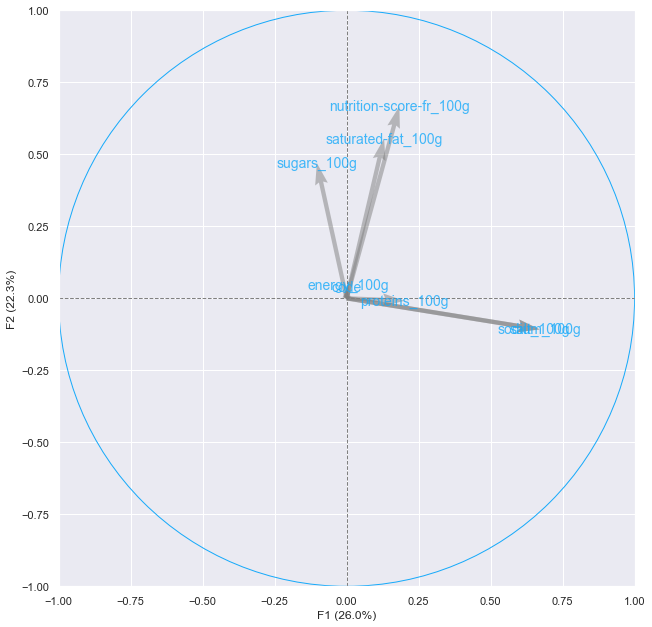

In [39]:
cerle_corr(pcs, 4, pca, [(0,1),(2,3)], labels = np.array(X2.columns), illustrative_var_corr = corrIv)

<a class="anchor" id="chapter7"></a>ANOVA

In [56]:
from scipy import stats
numeric_columns = off.select_dtypes(include = ['int32','float64']).columns
numeric_columns = numeric_columns[1:]
for column in numeric_columns:
    print('________\n{}'.format(column))
    k2, p = stats.normaltest(off[column], 
                             axis=0,
                             nan_policy = 'omit')
    alpha = 5e-2
    print("p = {:g}".format(p))
    if p < alpha:  # null hypothese: x a une distribution normale
        print("H0 est rejetée : {} n'est pas de distribution normale".format(column))
    else:
        print("H0 ne peut être rejetée :{}, on considère l'hypothèse de normalité".format(column))

________
saturated-fat_100g
p = 0
H0 est rejetée : saturated-fat_100g n'est pas de distribution normale
________
sugars_100g
p = 0
H0 est rejetée : sugars_100g n'est pas de distribution normale
________
proteins_100g
p = 0
H0 est rejetée : proteins_100g n'est pas de distribution normale
________
salt_100g
p = 0
H0 est rejetée : salt_100g n'est pas de distribution normale
________
sodium_100g
p = 0
H0 est rejetée : sodium_100g n'est pas de distribution normale
________
nutrition-score-fr_100g
p = 0
H0 est rejetée : nutrition-score-fr_100g n'est pas de distribution normale


In [57]:
from scipy import stats

data_a = off[off['nutrition_grade_fr'] == 'a'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_b = off[off['nutrition_grade_fr'] == 'b'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_c = off[off['nutrition_grade_fr'] == 'c'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_d = off[off['nutrition_grade_fr'] == 'd'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)
data_e = off[off['nutrition_grade_fr'] == 'e'].select_dtypes(['int32','float64']).dropna(axis=0).dropna(axis=1)

f_statistic, p = stats.f_oneway(
                                    data_b,
                                    data_c,
                                    data_d,
                                    data_e)

In [58]:
pd.DataFrame({'features': data_a.columns.tolist(),
              'p' : p,
              'bool_test' : p<alpha}) #si p<alpha : on rejette l'hypothèse d'indépendance H0 : les variables ne sont pas indépendantes

,features,p,bool_test
0,energy_100g,1.49387e-02,True
1,saturated-fat_100g,0.00000e+00,True
2,sugars_100g,0.00000e+00,True
3,proteins_100g,4.96178e-191,True
4,salt_100g,1.59585e-36,True
5,sodium_100g,1.57642e-36,True
6,nutrition-score-fr_100g,0.00000e+00,True


In [59]:
off.describe()

,code,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,4.01170e+04,4.01170e+04,40117.00000,40117.00000,40117.00000,40117.00000,40117.00000,40117.00000
mean,3.75151e+12,1.17918e+03,5.29488,12.60176,7.67770,1.00649,0.39626,8.35815
std,5.62747e+12,1.62464e+04,8.22434,18.47873,7.31716,3.32771,1.31004,9.01125
min,1.00000e+01,0.00000e+00,0.00000,-0.10000,0.00000,0.00000,0.00000,-15.00000
25%,3.22982e+12,4.25000e+02,0.30000,1.00000,1.90000,0.08000,0.03150,1.00000
50%,3.27322e+12,1.00800e+03,2.00000,3.70000,6.00000,0.60000,0.23622,8.00000
75%,3.58722e+12,1.63300e+03,7.20000,15.50000,11.00000,1.27000,0.50000,15.00000
max,3.66111e+14,3.25137e+06,210.00000,104.00000,82.00000,211.00000,83.00000,40.00000


In [60]:
off

,code,product_name,quantity,brands,categories,countries,nutrition_grade_fr,states_fr,main_category_fr,energy_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,40608754,"Pepsi, Nouveau goût !",15 cl,Pepsi,Sodas au cola,France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas,177.0,0.00,10.40,0.000,0.0254,0.01000,13.0
1,87177756,7Up,33 cl,"7Up,Pepsico","Sodas au citron,Boissons sucrées",France,e,"A vérifier,Complet,Informations nutritionnelle...",Sodas aux fruits,177.0,0.00,10.40,0.000,0.1000,0.03937,13.0
2,10,Madeleines nature,880 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1900.0,2.50,26.00,6.000,0.6600,0.25984,12.0
3,30,Cakes Raisins,900 g,Bijou,"Cakes aux raisins,Cakes,Gâteaux",France,d,"A vérifier,Complet,Informations nutritionnelle...",Gâteaux,1768.0,2.50,28.00,5.800,0.6500,0.25591,13.0
4,31,Cakes aux Fruits,600 g,Bijou,"Snacks sucrés,Desserts,Biscuits et gâteaux,Gât...",France,d,"A vérifier,Complet,Informations nutritionnelle...",Pâtisseries,1670.0,2.00,34.00,4.900,0.6000,0.23622,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40112,9557129019006,Healtier palm oil (L'huile de palme),500 ml,Carotino,Huiles de palme,France,d,"A compléter,Informations nutritionnelles compl...",Huiles,3400.0,39.00,0.00,0.000,0.0000,0.00000,16.0
40113,9577283844672,100% Pur Jus 4 agrumes,1 L,Cora,"Aliments et boissons à base de végétaux,Boisso...",France,c,"A vérifier,Complet,Informations nutritionnelle...",Jus de fruits,192.0,0.00,9.20,0.600,0.0300,0.01181,4.0
40114,96068779,Spearmint sans sucres,25 g,Fisherman's Friend,Bonbons,France,c,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1017.0,1.28,0.12,0.040,0.0050,0.00197,4.0
40115,96118580,Fisherman's Friend Miel-Citron,25 g,Fisherman's Friend,"Bonbons,Pastilles",France,b,"A vérifier,Complet,Informations nutritionnelle...",Bonbons,1031.0,1.28,0.10,0.004,0.0010,0.00039,2.0


In [61]:
categories_columns = ['categories', 'countries', 'nutrition_grade_fr', 'states_fr', 'main_category_fr']
for column in categories_columns:
    off[column] = off[column].astype('category')

In [62]:
off.dtypes

code                          int64
product_name                 object
quantity                     object
brands                       object
categories                 category
countries                  category
nutrition_grade_fr         category
states_fr                  category
main_category_fr           category
energy_100g                 float64
saturated-fat_100g          float64
sugars_100g                 float64
proteins_100g               float64
salt_100g                   float64
sodium_100g                 float64
nutrition-score-fr_100g     float64
dtype: object

In [34]:
categories_columns = off.select_dtypes(include = ['category']).columns

In [63]:
categories_columns

['categories',
 'countries',
 'nutrition_grade_fr',
 'states_fr',
 'main_category_fr']

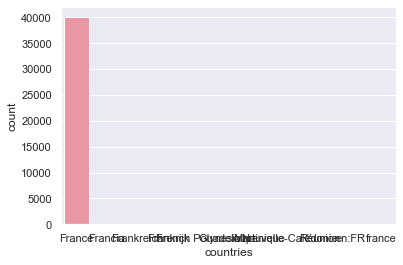

<Figure size 1080x576 with 0 Axes>

In [99]:
sns.countplot(x = off['countries'], data = off)
plt.figure(figsize=(15,8))

plt.show()

In [108]:
off2 = pd.read_csv('./off3.csv')

C:\Users\utilisateur\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


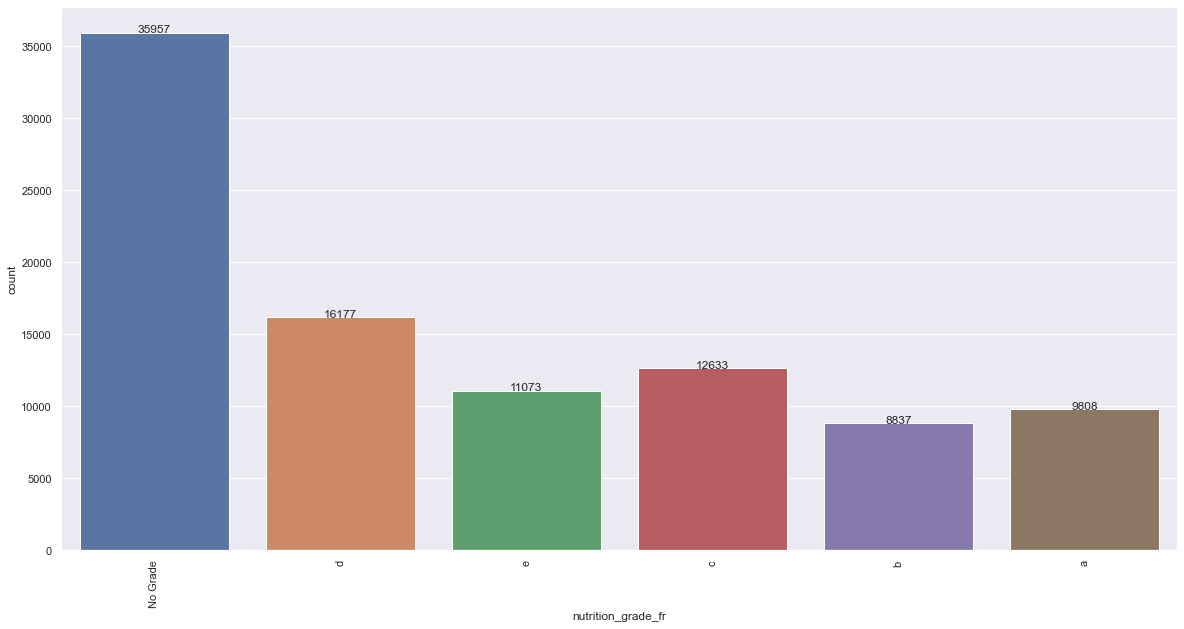

In [111]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='nutrition_grade_fr', data=off2)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

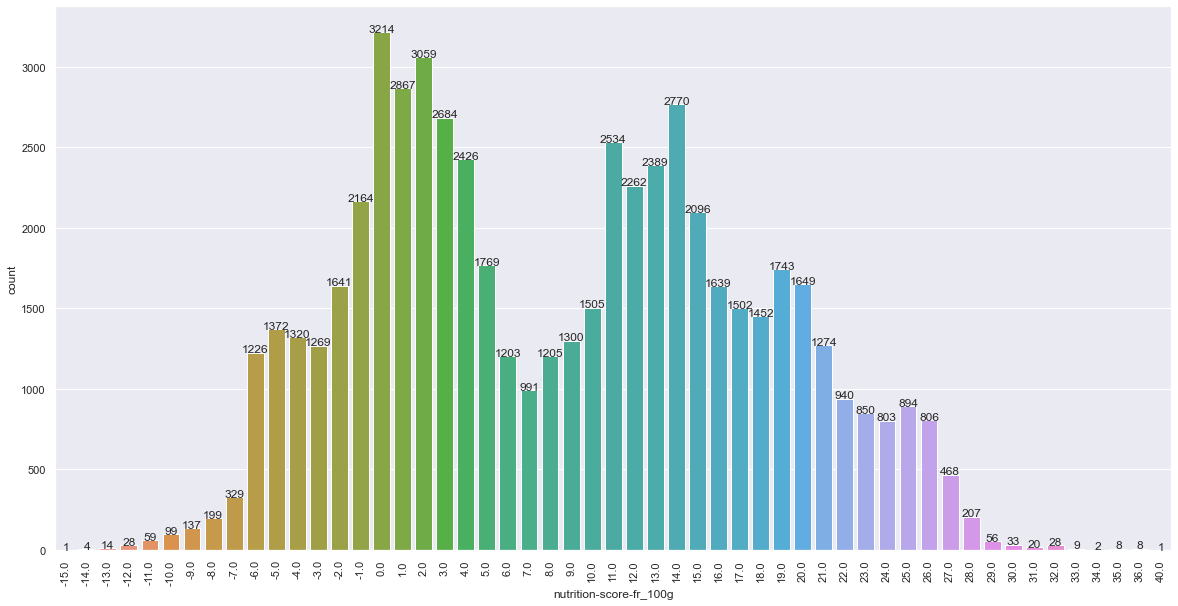

In [112]:
fig, ax1 = plt.subplots(figsize=(20,10))
graph = sns.countplot(ax=ax1,x='nutrition-score-fr_100g', data=off2)
graph.set_xticklabels(graph.get_xticklabels(),rotation=90)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

